#### 

In [11]:
# IMPORT

import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import os
import init

from astropy import wcs
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.vo.client import conesearch
from astropy import units as u

print(basedir)

./inputfiles/WWCrA2015/


In [12]:
# INDEX MEAN_MAG STDEV GOODPOINTS
def read_munifind(filename):
    df = pd.read_csv(filename, sep=',', index_col='star')
    return df.sort_values('probability', ascending=False)

udf = read_munifind(basedir+'upsilon_output.txt')
print(udf.head(10))
np.where(udf.index == 143)
print(udf.loc[143])

FileNotFoundError: File b'./inputfiles/WWCrA2015/upsilon_output.txt' does not exist

In [32]:
def setup_wcs(coord, naxis1, naxis2):
    w = wcs.WCS(naxis=2)

    # Set up an "Airy's zenithal" projection
    # Vector properties may be set with Python lists, or Numpy arrays
    w.wcs.crpix = [naxis1/2.0, naxis2/2.0]
    w.wcs.cdelt = np.array([-0.000572222222222, 0.000572222222222])
    print("ra/dec", coord.ra.degree, coord.dec.degree)
    w.wcs.crval = [coord.ra.degree, coord.dec.degree]
    w.wcs.ctype = ["RA---AIR", "DEC--AIR"]
    return w

def setup_wcs_from_file(filename):
    hdulist = fits.open(filename)
    return wcs.WCS(hdulist[0].header)
    
def pixel_to_radec(wcs_config, xpix, ypix):
    pixcrd = np.array([[xpix, ypix]], np.float_)
    result = wcs_config.wcs_pix2world(pixcrd, 1)
    return SkyCoord(result[0][0], result[0][1], unit='deg')

def star_to_radec():
    print("todo")
    
    
def get_fits_header(reference_file):
    hdulist = fits.open(reference_file)
    return hdulist[0].header


# fits_header = get_fits_header(reference_frame)
# object_ra = fits_header['OBJCTRA']
# object_dec = fits_header['OBJCTDEC']
# naxis1 = fits_header['NAXIS1']
# naxis2 = fits_header['NAXIS2']
    
    
# coords of center of frame of first image
# c = SkyCoord(object_ra, object_dec, unit="deg")
#wcs_config = setup_wcs(c, naxis1, naxis2)
print("file:",reference_frame, os.getcwd())
wcs_config = setup_wcs_from_file('./'+reference_frame)
result = pixel_to_radec(wcs_config, 1365, 1365)
print(result)

file: wcs.fits /home/jovyan/work
<SkyCoord (ICRS): (ra, dec) in deg
    ( 271.71773067, -43.42034535)>


In [33]:
#conesearch.list_catalogs()
my_catalog = 'Guide Star Catalog v2 1'
#c = SkyCoord.from_name('GSC 7911-3668')
#result = conesearch.conesearch(c, 0.01 * u.degree, catalog_db=my_catalog)
print(result)


<SkyCoord (ICRS): (ra, dec) in deg
    ( 271.71773067, -43.42034535)>


In [34]:
# Set the WCS information manually by setting properties of the WCS
# object.

# Create a new WCS object.  The number of axes must be set
# from the start
w = wcs.WCS(naxis=2)

# Set up an "Airy's zenithal" projection
# Vector properties may be set with Python lists, or Numpy arrays
w.wcs.crpix = [1365/2.0, 1365/2.0]
w.wcs.cdelt = np.array([-0.000572222222222, 0.000572222222222])
w.wcs.crval = [18.0936111, -43.8325000]
w.wcs.ctype = ["RA---AIR", "DEC--AIR"]

# Some pixel coordinates of interest.
pixcrd = np.array([[0, 0], [1365/2.0, 1365/2.0], [45, 98]], np.float_)

# Convert pixel coordinates to world coordinates
world = w.wcs_pix2world(pixcrd, 1)
print(world)

# Convert the same coordinates back to pixel coordinates.
pixcrd2 = w.wcs_world2pix(world, 1)
print(pixcrd2)

# These should be the same as the original pixel coordinates, modulo
# some floating-point error.
assert np.max(np.abs(pixcrd - pixcrd2)) < 1e-6

# Now, write out the WCS object as a FITS header
header = w.to_header()

# header is an astropy.io.fits.Header object.  We can use it to create a new
# PrimaryHDU and write it to a file.
hdu = fits.PrimaryHDU(header=header)
# Save to FITS file
# hdu.writeto('test.fits')

[[ 18.63856748 -44.22175161]
 [ 18.0936111  -43.8325    ]
 [ 18.60215434 -44.16583993]]
[[ -4.76461537e-10  -4.68389771e-10]
 [  6.82500000e+02   6.82500000e+02]
 [  4.50000000e+01   9.80000000e+01]]


Read the Munifind file to get STDEV of all stars

In [35]:

# INDEX MEAN_MAG STDEV GOODPOINTS
def read_munifind(filename):
    df = pd.read_csv(filename, skiprows=[1], sep=' ')
    df.rename(columns = {'INDEX':'STAR'}, inplace = True)
    print("max goodpoints:", df['GOODPOINTS'].max())
    print("min stdev:", df['STDEV'].min())
    print(df.sort_values('STDEV').head())
    return df

df = read_munifind(basedir+'munifind.txt')


max goodpoints: 166
min stdev: 0.00595
    STAR  MEAN_MAG    STDEV  GOODPOINTS
40    49   1.78410  0.00595         166
27    36   1.65304  0.00620         166
51    61   1.97571  0.00661         164
19    26   1.53687  0.00664         166
6      7   0.55005  0.00689         166


index 2675 is STAR          3109.00000
MEAN_MAG         6.09289
STDEV            0.09112
GOODPOINTS     156.00000
Name: 2675, dtype: float64


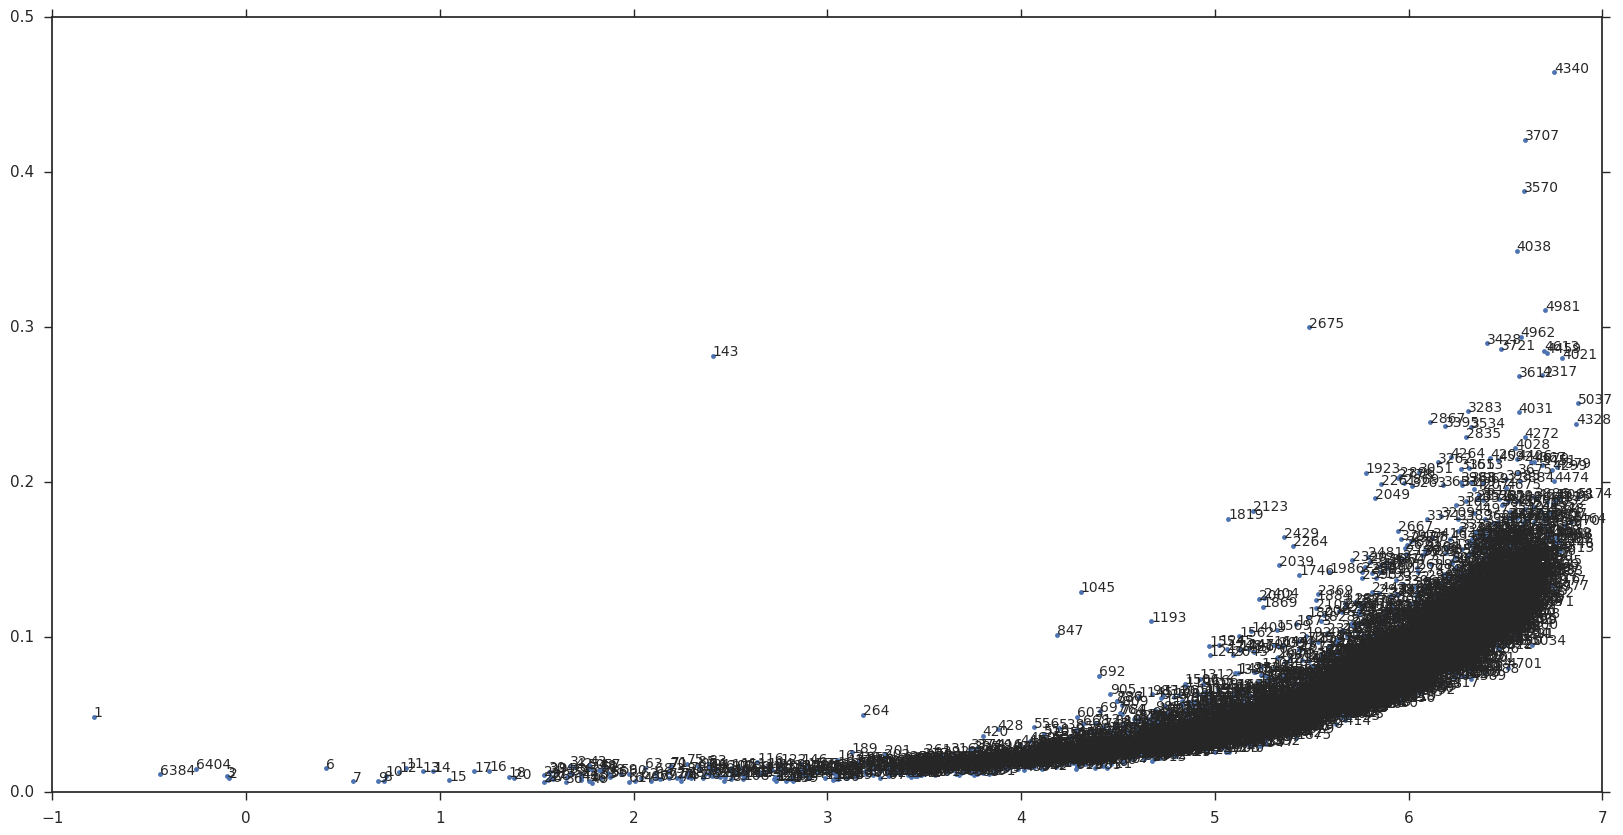

In [36]:
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
x = df['MEAN_MAG']
y = df['STDEV']
z = df['GOODPOINTS']
realx = x
realy = y
ax.plot(realx, realy, '.')
for i, d in enumerate(x):
    ax.annotate(df['STAR'][i], (realx[i],realy[i]))
print('index 2675 is', df.iloc[2675])


In [9]:
def getBestComparisonStars():
    result = []
    # TODO: filter all stars which have not the maximum of GOODPOINTS
    df_lowest_stdev = df.sort_values('STDEV')
    return df_lowest_stdev.head(10)
    
bestcomps = getBestComparisonStars()
print(bestcomps)
check_stars = []
for index, row in bestcomps.iterrows():
    #print(row, '\n')
    check_stars.append(int(row['STAR']))
check_stars_str = ','.join(map(str, check_stars)) 
print(check_stars_str)

     STAR  MEAN_MAG    STDEV  GOODPOINTS
40     49   1.78410  0.00595         166
27     36   1.65304  0.00620         166
51     61   1.97571  0.00661         164
19     26   1.53687  0.00664         166
6       7   0.55005  0.00689         166
52     64   2.00887  0.00692         162
119   139   2.82141  0.00693         166
37     46   1.77020  0.00694         166
7       9   0.68259  0.00709         166
85     98   2.46659  0.00714         166
49,36,61,26,7,64,139,46,9,98


In [10]:
print(df.iloc[143])

STAR          166.00000
MEAN_MAG        3.03134
STDEV           0.00753
GOODPOINTS    158.00000
Name: 143, dtype: float64


In [37]:
select_star_list = [143,6394,598,2675,3111,2584]
single_star_list = [598]
all_star_list = range(1,1000)
upsilon_star_list = udf.head(10).index.values.tolist()
star_list = upsilon_star_list


Reading lightcurve 751


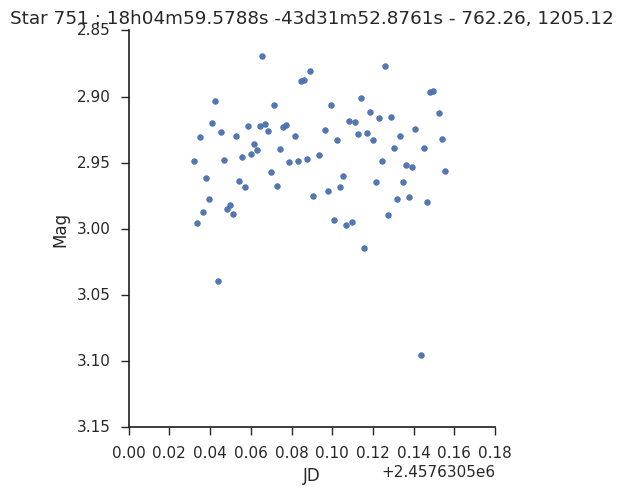

Reading lightcurve 551


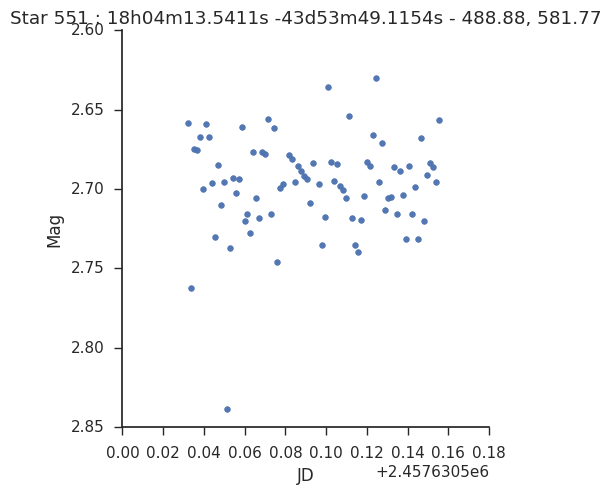

Reading lightcurve 503


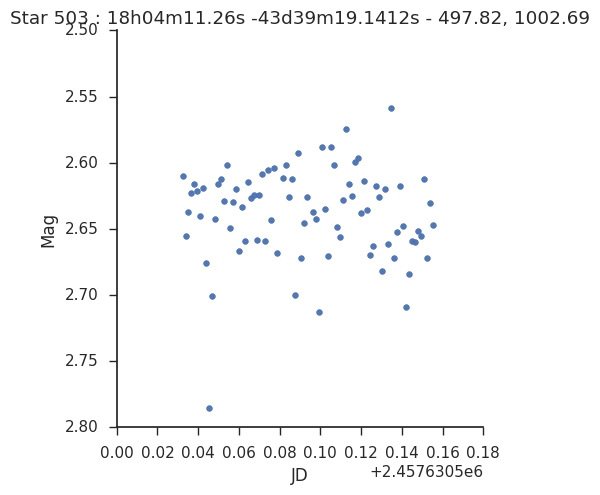

Reading lightcurve 560


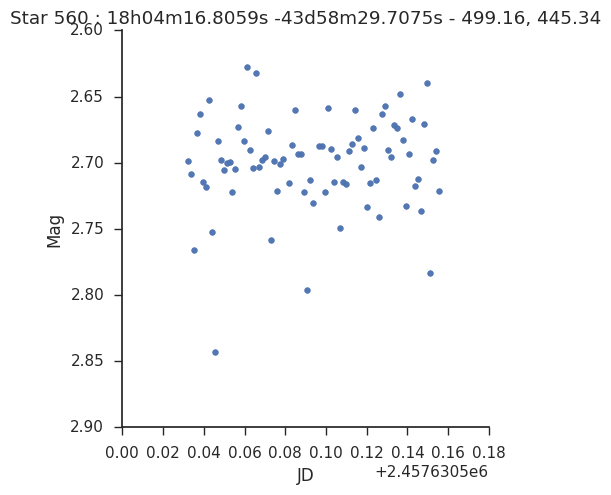

Reading lightcurve 832


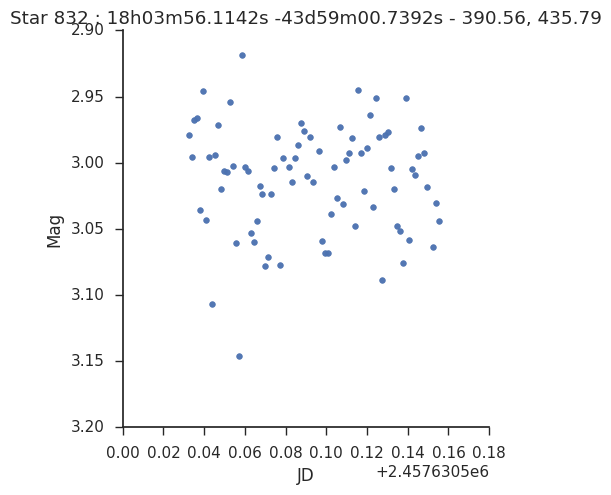

Reading lightcurve 978


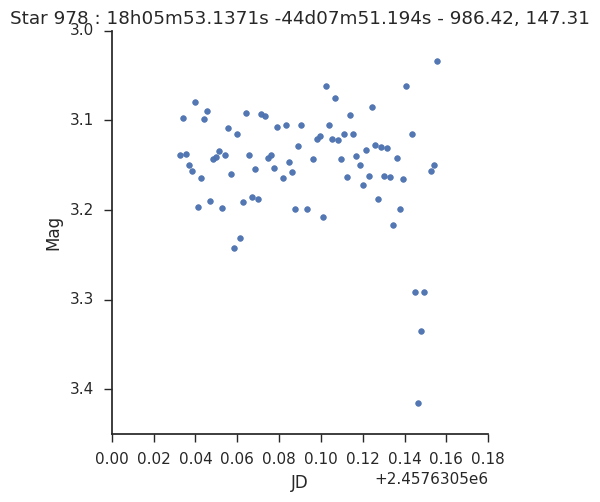

Reading lightcurve 948


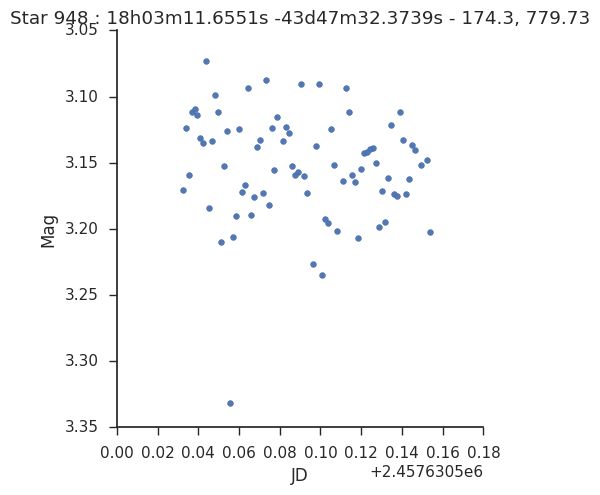

Reading lightcurve 976


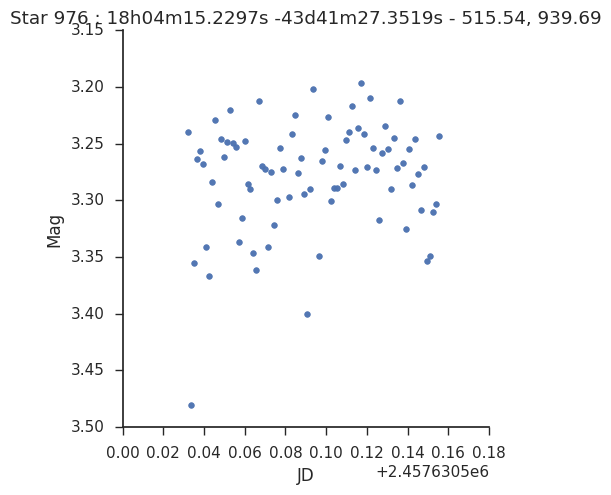

Reading lightcurve 994


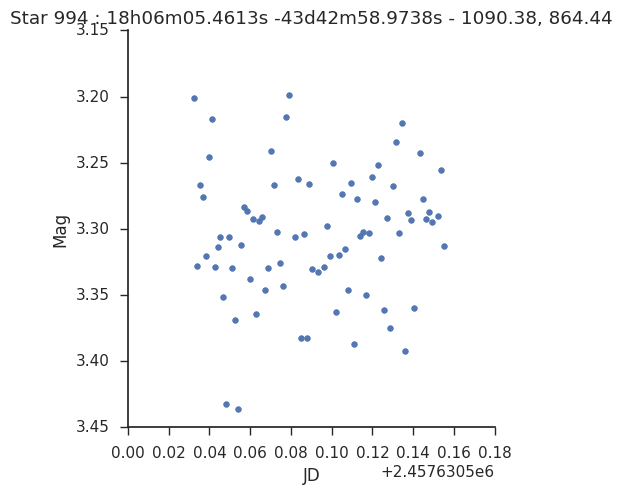

Reading lightcurve 461


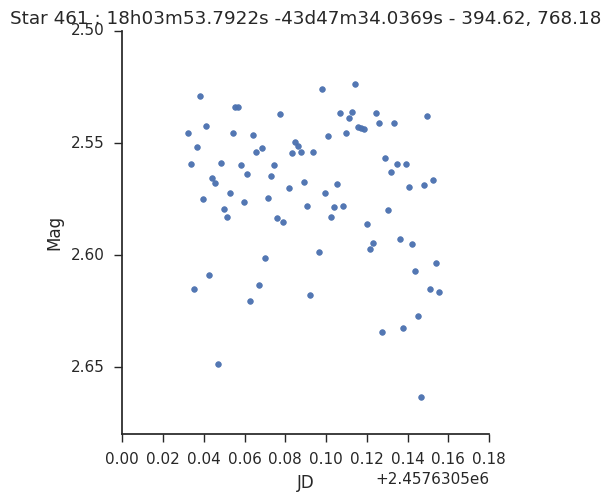

In [38]:
def set_seaborn_style():
    sns.set_context("notebook", font_scale=1.1)
    sns.set_style("ticks")

def read_lightcurve(star):
    print("Reading lightcurve", star)
    df = pd.read_csv(lightcurve_dir + str(star) + '.txt', skiprows=[1], sep=' ')
    df = df[df['V-C'] < 99]
    return df

def read_pos(star):
    df = pd.read_csv(lightcurve_dir + 'pos_' + str(star) + '.txt', skiprows=[1], sep=' ')
    df = df[df['X'] > 0]
    df = df[df['MAG'] < 99]
    return (df['X'].iloc[1], df['Y'].iloc[1])

def plot_lightcurve(df2, pos, name):
    g = sns.lmplot('JD', 'V-C', 
               data=df2, 
               fit_reg=False)
    plt.title('Star '+ str(name) + " : " + pixel_to_radec(wcs_config, pos[0], pos[1]).to_string('hmsdms') + ' - ' +str(pos[0]) + ', ' + str(pos[1]))
    plt.xlabel('JD')
    plt.ylabel('Mag')    
    plt.gca().invert_yaxis()
    plt.ticklabel_format(style='plain', axis='x')
    plt.figure(figsize=(70,10)) 
    sns.plt.show()
    g.savefig(lightcurve_dir+str(star))
    
set_seaborn_style()
for star in star_list:
    plot_lightcurve(read_lightcurve(star), read_pos(star), star)
